In [1]:
import scipy.sparse
import scipy.linalg
import numpy as np
import mkprop
from exlaser import doublewellproblem as prob
import matplotlib.pyplot as plt

n=2000
L=5
Hamiltonian = prob(n,L)

x, nrm, inr = Hamiltonian.getprop()
tend = 5.0
u = Hamiltonian.getinitialstate()

mv, dmv = Hamiltonian.setupHamiltonian(0)

In [2]:
np.set_printoptions(linewidth=180)
m=40
tol=1e-4

In [3]:
y0=u
amat=[1]
cmat=[[1/2]]
tinit = 4.73e-5

tend = 0.05
tnow = 0
dt = min(tinit,tend-tnow)
nexps=1
while (tnow<tend):
    mv, dmv = Hamiltonian.setupHamiltonian(tnow+0.5*dt)
    y1, errest, tlist, mlist = mkprop.expimv_pKry(mv,y0,t=dt,m=m,ktype=2,reo=1)
    errst=0
    if errest<dt*tol:
        y0=y1
        tnow += dt
    dt = min(tinit,tend-tnow)

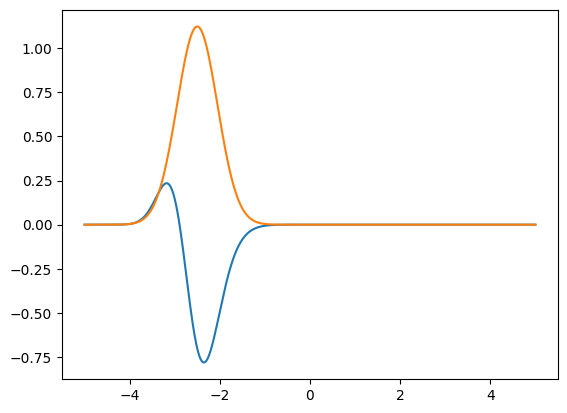

In [4]:
plt.plot(x,y1.real,x,u.real)

In [6]:
tol=1e-6
y0=u
amat=[1]
cmat=[[1/2]]
tinit = 0.0001

p=2
tend = 0.05
tnow = 0
dt = min(tinit,tend-tnow)
nexps=1
sig = 1j
tlist=[]
dtlist=[]
errmlist=[]
spstep=0.9
spstepfail=0.7
errpartm=0.99
tolkry=(1-errpartm)*tol
while (tnow<tend):
    mv, dmv = Hamiltonian.setupHamiltonian(tnow+0.5*dt)
    y1, errestkry, tkrylist, mlist = mkprop.expimv_pKry(mv,y0,tol=tolkry,t=dt,m=m,ktype=2,reo=0)

    # computer error estimate
    dHpsi = dmv(y1)
    HdHpsi = mv(dHpsi)
    Hpsi = mv(y1)
    dHHpsi = dmv(Hpsi)
    defp1 = Hpsi + 0.5*dt*dHpsi + 0.5*sig*dt**2/2*(HdHpsi-dHHpsi)
    
    mv2, _ = Hamiltonian.setupHamiltonian(tnow+dt)
    def1 = defp1-mv2(y1)
    errestmag = dt/(p+1)*nrm(def1)

    # test error estimate
    if errestkry+errestmag<dt*tol:
        y0 = y1
        tnow += dt
        dtlist.append(dt)
        tlist.append(tnow)
        errmlist.append(errestmag)
        dtnew = spstep * (errpartm * dt * tol/errestmag)**(1.0/p) * dt
        print("try dt=%.3e, errest=%.2e, newdt=%.3e - used" % (dt,(errestkry+errestmag)/dt,dtnew))
        dt = min(dtnew,tend-tnow)
    else:
        print("try dt=%.3e, errest=%.2e, failed" % (dt,(errestkry+errestmag)/dt))
        dtnew = spstepfail * (errpartm * dt * tol/errestmag)**(1.0/p) * dt
        dt = min(dtnew,tend-tnow)



try dt=1.000e-04, errest=7.07e-09, newdt=2.187e-02 - used
try dt=2.187e-02, errest=1.74e-04, failed
try dt=1.154e-03, errest=3.82e-08, newdt=6.092e-03 - used
try dt=6.092e-03, errest=4.91e-06, failed
try dt=1.916e-03, errest=2.41e-07, newdt=3.570e-03 - used
try dt=3.570e-03, errest=1.77e-06, failed
try dt=1.875e-03, errest=3.96e-07, newdt=2.702e-03 - used
try dt=2.702e-03, errest=1.25e-06, failed
try dt=1.689e-03, errest=4.47e-07, newdt=2.287e-03 - used
try dt=2.287e-03, errest=1.08e-06, failed
try dt=1.538e-03, errest=4.66e-07, newdt=2.040e-03 - used
try dt=2.040e-03, errest=1.00e-06, failed
try dt=1.424e-03, errest=4.73e-07, newdt=1.871e-03 - used
try dt=1.871e-03, errest=9.61e-07, newdt=1.718e-03 - used
try dt=1.718e-03, errest=9.41e-07, newdt=1.594e-03 - used
try dt=1.594e-03, errest=9.14e-07, newdt=1.501e-03 - used
try dt=1.501e-03, errest=8.97e-07, newdt=1.427e-03 - used
try dt=1.427e-03, errest=8.84e-07, newdt=1.367e-03 - used
try dt=1.367e-03, errest=8.75e-07, newdt=1.316e-03 -

In [7]:
plt.semilogy(tlist,dtlist,tlistx,dtlistx)
#plt.semilogy(tlist,dtlist)

NameError: name 'tlistx' is not defined

In [8]:
print(nrm(y1-yx)/tend)

NameError: name 'yx' is not defined

In [9]:
yx=y1
tlistx=tlist
dtlistx=dtlist

In [10]:
tol=1e-4
y0=u
amat=[1]
cmat=[[1/2]]
tinit = 0.0001

p=2
tend = 0.05
tnow = 0
dt = min(tinit,tend-tnow)
nexps=1
sig = 1j
tlist=[]
dtlist=[]
errmlist=[]
spstep=0.9
spstepfail=0.7
errpartm=0.99
tolkry=(1-errpartm)*tol
mv0, _ = Hamiltonian.setupHamiltonian(tnow)
y0e = mv0(y0)
while (tnow<tend):
    mv, dmv = Hamiltonian.setupHamiltonian(tnow+0.5*dt)
    y1, errestkry, tkrylist, mlist = mkprop.expimv_pKry(mv,y0,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
    y1e, errestkry, tkrylist, mlist = mkprop.expimv_pKry(mv,y0e,tol=tolkry,t=dt,m=m,ktype=2,reo=0)

    # computer error estimate
    defp1 = mv(y1)
    mv2, _ = Hamiltonian.setupHamiltonian(tnow+dt)
    y1enext = mv2(y1)
    def1 = defp1-0.5*y1enext-0.5*y1e
    errestmag = dt/(p+1)*nrm(def1)

    # test error estimate
    if errestkry+errestmag<dt*tol:
        y0 = y1
        y0e = y1enext
        tnow += dt
        dtlist.append(dt)
        tlist.append(tnow)
        errmlist.append(errestmag)
        dtnew = spstep * (errpartm * dt * tol/errestmag)**(1.0/p) * dt
        print("try dt=%.3e, errest=%.2e, newdt=%.3e - used" % (dt,(errestkry+errestmag)/dt,dtnew))
        dt = min(dtnew,tend-tnow)
    else:
        print("try dt=%.3e, errest=%.2e, failed" % (dt,(errestkry+errestmag)/dt))
        dtnew = spstepfail * (errpartm * dt * tol/errestmag)**(1.0/p) * dt
        dt = min(dtnew,tend-tnow)



try dt=1.000e-04, errest=3.38e-07, newdt=5.175e-03 - used
try dt=5.175e-03, errest=2.78e-06, newdt=3.463e-02 - used
try dt=3.463e-02, errest=6.69e-04, failed
try dt=9.336e-03, errest=2.25e-05, newdt=1.802e-02 - used
try dt=1.802e-02, errest=1.90e-04, failed
try dt=9.126e-03, errest=4.05e-05, newdt=1.300e-02 - used
try dt=1.300e-02, errest=1.26e-04, failed
try dt=8.088e-03, errest=4.57e-05, newdt=1.084e-02 - used
try dt=1.084e-02, errest=1.07e-04, failed
try dt=7.317e-03, errest=4.73e-05, newdt=9.626e-03 - used
try dt=9.626e-03, errest=9.91e-05, newdt=8.703e-03 - used
try dt=1.231e-03, errest=2.76e-06, newdt=8.252e-03 - used
